# Stats 131 Final Project
by Will Jung, Iris Liu, Kellie Lue, Jean Rim 

## Part 1: Background Information

(insert info)

## Part 2.1: Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MCresponses = pd.read_csv('multipleChoiceResponses.csv')
MCresponses.head()

C:\Users\Iris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


This data needs a lot of cleaning because it is difficult to work with so many columns and obscure variable names.  
Therefore, we created a subset of the data.

### Subsetting Data

In [3]:
# Created a subset of the data based on interesting information
data = MCresponses.loc[:, ('Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q9','Q10','Q12_MULTIPLE_CHOICE','Q23','Q24','Q26')]
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10,Q12_MULTIPLE_CHOICE,Q23,Q24,Q26
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,What is the primary tool that you use at work ...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,Do you consider yourself to be a data scientist?
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes


In [4]:
print(data.loc[0,:]) # These column names are not clear
data.columns = ['gender','age','country','education','undergrad_major',
                'current_title','years_exp_curr_role','yearly_compensation',
                'employer_ml', 'primary_data_tool','percentage_time_spent_coding', 
                'coding_exp', 'data_scientist']

# Delete first row
data = data.drop([0], axis=0)
data.head()

Q1                                What is your gender? - Selected Choice
Q2                                           What is your age (# years)?
Q3                             In which country do you currently reside?
Q4                     What is the highest level of formal education ...
Q5                     Which best describes your undergraduate major?...
Q6                     Select the title most similar to your current ...
Q8                     How many years of experience do you have in yo...
Q9                     What is your current yearly compensation (appr...
Q10                    Does your current employer incorporate machine...
Q12_MULTIPLE_CHOICE    What is the primary tool that you use at work ...
Q23                    Approximately what percent of your time at wor...
Q24                    How long have you been writing code to analyze...
Q26                     Do you consider yourself to be a data scientist?
Name: 0, dtype: object


,gender,age,country,education,undergrad_major,current_title,years_exp_curr_role,yearly_compensation,employer_ml,primary_data_tool,percentage_time_spent_coding,coding_exp,data_scientist
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,0-1,"0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)",75% to 99% of my time,5-10 years,Maybe


### Dealing with NA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null object
age                             23859 non-null object
country                         23859 non-null object
education                       23438 non-null object
undergrad_major                 22947 non-null object
current_title                   22900 non-null object
years_exp_curr_role             21101 non-null object
yearly_compensation             20185 non-null object
employer_ml                     20669 non-null object
primary_data_tool               19198 non-null object
percentage_time_spent_coding    18547 non-null object
coding_exp                      18533 non-null object
data_scientist                  18480 non-null object
dtypes: object(13)
memory usage: 2.5+ MB


The logic here was to check whether a 'default' bin already existed through `unique()` (e.g. "Other", "I prefer not to answer", etc.) and to put the NA's into that pre-existing bin.

In [6]:
data.education = data.education.fillna('I prefer not to answer')
data.undergrad_major = data.undergrad_major.fillna('Other')
data.current_title = data.current_title.fillna('Other')
data.data_scientist = data.data_scientist.fillna('Maybe')
data.employer_ml = data.employer_ml.fillna('I do not know')
data.primary_data_tool = data.primary_data_tool.fillna('Other')


data.years_exp_curr_role = data.years_exp_curr_role.fillna('0-1')
data.yearly_compensation = data.yearly_compensation.fillna('I do not wish to disclose my approximate yearly compensation')
data.coding_exp = data.coding_exp.fillna('I prefer not to answer')

#percentage_time_spent_coding realistically would have a new bin 'I do not know'
data.percentage_time_spent_coding = data.percentage_time_spent_coding.fillna('I do not know')

Some variables (years of experience at current role, yearly compensation, and coding experience) had various bin sizes, so we combined the smaller bins to make the bin size more uniform.

In [7]:
data.loc[(data['years_exp_curr_role'] == '0-1') | 
         (data['years_exp_curr_role'] == '1-2') | 
         (data['years_exp_curr_role'] == '2-3') | 
         (data['years_exp_curr_role'] == '3-4') |
         (data['years_exp_curr_role'] == '4-5'), 'years_exp_curr_role'] = '0-5'

#change to categorical and reorder
data.years_exp_curr_role = data.years_exp_curr_role.astype('category')
data.years_exp_curr_role = data.years_exp_curr_role.cat.reorder_categories(['0-5', '5-10', '10-15','15-20','20-25','25-30','30 +'])
pd.crosstab(data.years_exp_curr_role, columns = 'count')

col_0,count
years_exp_curr_role,
0-5,18217
5-10,2524
10-15,1512
15-20,854
20-25,384
25-30,171
30 +,197


In [8]:
data.loc[(data['yearly_compensation'] == '0-10,000') | 
        (data['yearly_compensation'] == '10-20,000') | 
        (data['yearly_compensation'] == '20-30,000') |
        (data['yearly_compensation'] == '30-40,000') |
        (data['yearly_compensation'] == '40-50,000'), 'yearly_compensation'] = '0-50,000'
data.loc[(data['yearly_compensation'] == '50-60,000') | 
        (data['yearly_compensation'] == '60-70,000') | 
        (data['yearly_compensation'] == '70-80,000') |
        (data['yearly_compensation'] == '80-90,000') |
        (data['yearly_compensation'] == '90-100,000'), 'yearly_compensation'] = '50-100,000'
data.loc[(data['yearly_compensation'] == '100-125,000') | 
        (data['yearly_compensation'] == '125-150,000'), 'yearly_compensation'] = '100-150,000'

#change to categorical and reorder
data.yearly_compensation = data.yearly_compensation.astype('category')
data.yearly_compensation = data.yearly_compensation.cat.reorder_categories(['0-50,000', '50-100,000','100-150,000','150-200,000',
                                                                            '200-250,000','250-300,000','300-400,000','400-500,000',
                                                                            '500,000+',
                                                                            'I do not wish to disclose my approximate yearly compensation'])
pd.crosstab(data.yearly_compensation, columns = 'count')

col_0,count
yearly_compensation,
"0-50,000",9814
"50-100,000",3397
"100-150,000",1376
"150-200,000",457
"200-250,000",172
"250-300,000",75
"300-400,000",52
"400-500,000",23
"500,000+",63


In [9]:
data.loc[(data['coding_exp'] == 'I have never written code and I do not want to learn') |
        (data['coding_exp'] == 'I have never written code but I want to learn') | 
        (data['coding_exp'] == 'I prefer not to answer'), 'coding_exp'] = 'None'
data.loc[(data['coding_exp'] == '1-2 years') |
        (data['coding_exp'] == '3-5 years'), 'coding_exp'] = '1-5 years'

#change to categorical and reorder
data.coding_exp = data.coding_exp.astype('category')
data.coding_exp = data.coding_exp.cat.reorder_categories(['None', '< 1 year', '1-5 years', '5-10 years', '10-20 years', '20-30 years',
                                                          '30-40 years', '40+ years'])
pd.crosstab(data.coding_exp, columns = 'count')

col_0,count
coding_exp,
None,6188
< 1 year,4542
1-5 years,9382
5-10 years,2145
10-20 years,1102
20-30 years,321
30-40 years,117
40+ years,62


In [10]:
#reorder some other categories
data.education = data.education.astype('category')
data.education = data.education.cat.reorder_categories(['No formal education past high school',
                                                        'Some college/university study without earning a bachelor’s degree',
                                                        'Bachelor’s degree', 'Professional degree', 'Master’s degree', 'Doctoral degree',
                                                        'I prefer not to answer'])
pd.crosstab(data.education, columns = 'count')

col_0,count
education,
No formal education past high school,232
Some college/university study without earning a bachelor’s degree,967
Bachelor’s degree,7083
Professional degree,599
Master’s degree,10855
Doctoral degree,3357
I prefer not to answer,766


In [11]:
data.data_scientist = data.data_scientist.astype('category')
data.data_scientist = data.data_scientist.cat.reorder_categories(['Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes'])
pd.crosstab(data.data_scientist, columns = 'count')

col_0,count
data_scientist,
Definitely not,1557
Probably not,3162
Maybe,9563
Probably yes,4893
Definitely yes,4684


In [12]:
#check that there are no more NA's
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null object
age                             23859 non-null object
country                         23859 non-null object
education                       23859 non-null category
undergrad_major                 23859 non-null object
current_title                   23859 non-null object
years_exp_curr_role             23859 non-null category
yearly_compensation             23859 non-null category
employer_ml                     23859 non-null object
primary_data_tool               23859 non-null object
percentage_time_spent_coding    23859 non-null object
coding_exp                      23859 non-null category
data_scientist                  23859 non-null category
dtypes: category(5), object(8)
memory usage: 1.8+ MB


## Part 2.2: Exploratory Analysis

data_scientist                Definitely not  Probably not  Maybe  \
percentage_time_spent_coding                                        
0% of my time                            167           152    115   
1% to 25% of my time                     555          1015   1078   
100% of my time                           39            72    109   
25% to 49% of my time                    345           849   1175   
50% to 74% of my time                    298           712   1232   
75% to 99% of my time                    151           359    553   
I do not know                              2             3   5301   

data_scientist                Probably yes  Definitely yes  
percentage_time_spent_coding                                
0% of my time                           55              55  
1% to 25% of my time                   890             659  
100% of my time                        109             155  
25% to 49% of my time                 1414            1232  
50% to 74% o

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

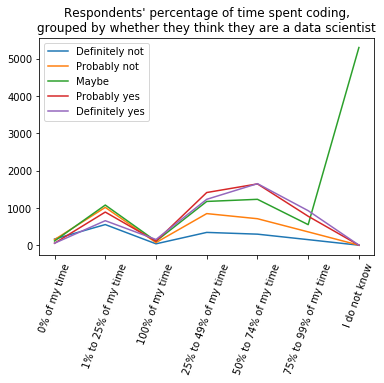

In [13]:
# Relationship between % time spent coding and whether they identified as a data scientist
table = data.groupby(['percentage_time_spent_coding', 'data_scientist']).gender.count().unstack()

# Reorder to view easily
table = table.loc[:, ('Definitely not', 'Probably not', 'Maybe', 'Probably yes', 'Definitely yes')]
print(table)

plt.plot(table)
plt.title("Respondents' percentage of time spent coding,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 70)